In [1]:
import os
import cv2
from tqdm import tqdm
import numpy as np
import pandas as pd
import networkx as nx
from IPython.display import Image

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision
from PIL import Image

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from skimage.metrics import structural_similarity
from skimage.registration import phase_cross_correlation

from itertools import combinations

import warnings
warnings.filterwarnings('ignore') 

pd.options.mode.chained_assignment = None  # default='warn'

def generate_unique_pairs(word_list):
    result = []
    for pair in combinations(word_list, 2):
        result.append(pair)
    return result

In [2]:
transform_augmentation = transforms.Compose(
    [
        transforms.PILToTensor(),
        transforms.GaussianBlur(1, sigma=(0.1, 2.0)),
        transforms.RandomAffine(degrees=2, translate=(0.05, 0.05), fill=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
        transforms.RandomErasing(p=0.5, scale=(0.0001, 0.001), ratio=(1, 1), value=255),
    ]
)

transform_augmentation_negative = transforms.Compose(
    [
        transforms.PILToTensor(),
        transforms.GaussianBlur(1, sigma=(0.1, 2.0)),
        transforms.RandomAffine(degrees=3, translate=(0.05, 0.05), fill=255),
        transforms.ElasticTransform(alpha=50.0),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
        transforms.RandomErasing(
            p=0.5, scale=(0.0001, 0.0001), ratio=(1, 1), value=255
        ),
    ]
)

In [3]:
def transformation(transform, image1_path):
    img = Image.open(image1_path)
    img = img.convert("L")

    # Apply image transformations
    img = transform(img)
    return img

In [4]:
df = pd.read_csv("/home/yuxiao/nii_project/dataset/df/feature_data.csv")

df_label_groupby = df.groupby("label").size()

img_file_1 = df[
    df["label"].isin(df_label_groupby[df_label_groupby == 1].index)
].image_file.values

img_file_2 = (
    df[df["label"].isin(df_label_groupby[df_label_groupby > 1].index)]
    .groupby("label")
    .apply(lambda x: x.sample(n=2))
    .image_file.values
)

aug_img = list(img_file_1) + list(img_file_2)

  0%|          | 0/7123 [00:00<?, ?it/s]

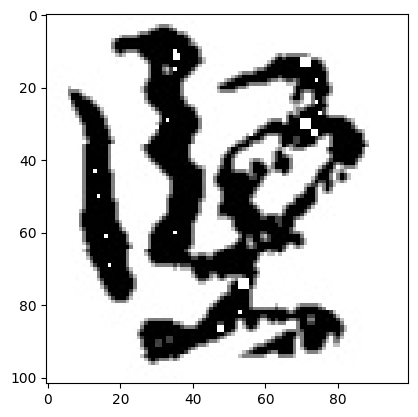

  0%|          | 1/7123 [00:00<33:16,  3.57it/s]

------


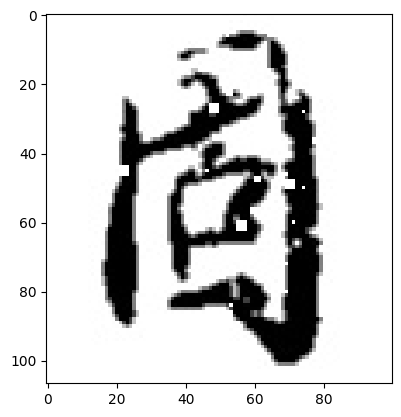

  0%|          | 2/7123 [00:00<28:09,  4.21it/s]

------


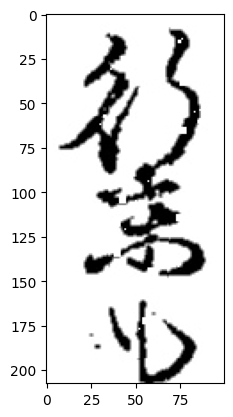

  0%|          | 3/7123 [00:00<27:46,  4.27it/s]

------


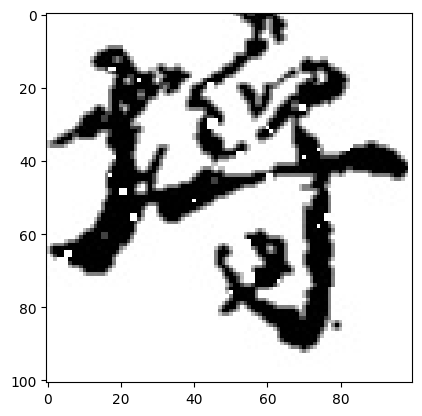

  0%|          | 4/7123 [00:00<29:52,  3.97it/s]

------


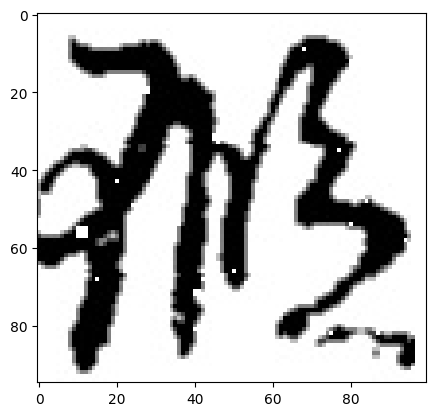

  0%|          | 5/7123 [00:01<27:55,  4.25it/s]

------


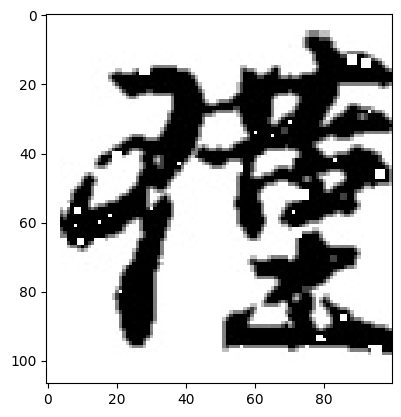

  0%|          | 5/7123 [00:01<33:37,  3.53it/s]

------


In [7]:
for i in tqdm(range(120, len(aug_img))):
    augmented = transformation(
        transform_augmentation, "/home/yuxiao/nii_project/dataset/2/" + aug_img[i]
    )[0].numpy()
    image = Image.fromarray(augmented.astype("uint8"), mode="L")
    plt.imshow(image, cmap='gray')
    plt.show()
    print("------")

    if i == 125:
        break
    # image.save("/home/yuxiao/nii_project/dataset/2_augmented/" + aug_img[i], "JPEG")

In [9]:
transform = transforms.Compose([transforms.Resize((105, 105)), transforms.ToTensor()])


def transformation(transform, image1_path):
    img = Image.open(image1_path)
    img = img.convert("L")

    # Apply image transformations
    img = transform(img)
    return img


def registration(img1_path, img2_path):
    imgRef = cv2.imread(img1_path)
    imgTest = cv2.imread(img2_path)
    # Convert to grayscale.
    imgTest_grey = cv2.cvtColor(imgTest, cv2.COLOR_BGR2GRAY)
    imgRef_grey = cv2.cvtColor(imgRef, cv2.COLOR_BGR2GRAY)

    height1, width1 = imgRef_grey.shape
    height2, width2 = imgTest_grey.shape

    height_max = max(height1, height2)
    width_max = max(width1, width2)

    # Pad the images to same size
    imgRef_grey = cv2.copyMakeBorder(
        imgRef_grey,
        height_max - height1,
        0,
        width_max - width1,
        0,
        cv2.BORDER_REPLICATE,
    )
    imgTest_grey = cv2.copyMakeBorder(
        imgTest_grey,
        height_max - height2,
        0,
        width_max - width2,
        0,
        cv2.BORDER_REPLICATE,
    )

    # pixel precision first

    shift, _, _ = phase_cross_correlation(imgRef_grey, imgTest_grey)
    # print(f"Detected subpixel offset (y, x): {shift}")

    height_offset, weith_offset = int(shift[0]), int(shift[1])

    # Compute Similarity
    if height_offset > 0 and weith_offset > 0:
        imgRef_grey = imgRef_grey[height_offset:, weith_offset:]
        imgTest_grey = imgTest_grey[:-height_offset, :-weith_offset]

    elif height_offset > 0 and weith_offset < 0:
        imgRef_grey = imgRef_grey[height_offset:, :weith_offset]
        imgTest_grey = imgTest_grey[:-height_offset, -weith_offset:]

    elif height_offset < 0 and weith_offset > 0:
        imgRef_grey = imgRef_grey[:height_offset, weith_offset:]
        imgTest_grey = imgTest_grey[-height_offset:, :-weith_offset]

    elif height_offset < 0 and weith_offset < 0:
        imgRef_grey = imgRef_grey[:height_offset, :weith_offset]
        imgTest_grey = imgTest_grey[-height_offset:, -weith_offset:]

    elif height_offset == 0 and weith_offset > 0:
        imgRef_grey = imgRef_grey[:, weith_offset:]
        imgTest_grey = imgTest_grey[:, :-weith_offset]

    elif height_offset == 0 and weith_offset < 0:
        imgRef_grey = imgRef_grey[:, :weith_offset]
        imgTest_grey = imgTest_grey[:, -weith_offset:]

    elif height_offset > 0 and weith_offset == 0:
        imgRef_grey = imgRef_grey[height_offset:, :]
        imgTest_grey = imgTest_grey[:-height_offset, :]

    elif height_offset < 0 and weith_offset == 0:
        imgRef_grey = imgRef_grey[:height_offset, :]
        imgTest_grey = imgTest_grey[-height_offset:, :]

    elif height_offset == 0 and weith_offset == 0:
        imgRef_grey = imgRef_grey
        imgTest_grey = imgTest_grey

    return imgRef_grey, imgTest_grey


def register(img1_path, img2_path):
    imgRef_grey, imgTest_grey = registration(img1_path, img2_path)

    imgRef_grey = transform(Image.fromarray(imgRef_grey).convert("L"))
    imgTest_grey = transform(Image.fromarray(imgTest_grey).convert("L"))

    return imgRef_grey.to(device), imgTest_grey.to(device)


def computer_sim_score(img1_path, img2_path):
    imgRef_grey, imgTest_grey = registration(img1_path, img2_path)

    (score, diff) = structural_similarity(
        imgRef_grey,
        imgTest_grey,
        full=True,
    )

    return score

In [10]:
df = pd.read_csv("/home/yuxiao/nii_project/dataset/df/feature_data.csv")
df_plot = pd.read_csv("/home/yuxiao/nii_project/dataset/df/df_plot.csv")

human_annotation = pd.read_csv("/home/yuxiao/nii_project/dataset/human_annotation.csv")
human_annotation = human_annotation[["img1", "img2", "score"]]
human_annotation = human_annotation[human_annotation["score"] != 2]
human_annotation.rename(
    columns={"img1": "image1", "img2": "image2", "score": "label"}, inplace=True
)

In [11]:
onlyfiles = os.listdir("/home/yuxiao/nii_project/dataset/2/")

In [12]:
human_annotation = human_annotation[human_annotation["image1"].isin(onlyfiles) & human_annotation["image2"].isin(onlyfiles)]

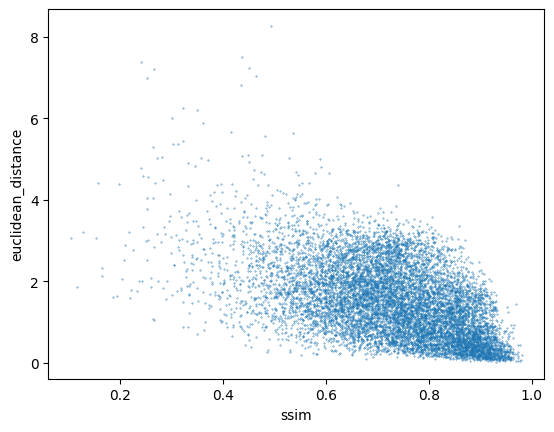

In [14]:
ax1 = df_plot.sample(10000).plot.scatter(x='ssim',y='euclidean_distance', s=0.1)

In [13]:
human_annotation.groupby("label").size()

label
0    2535
1    3463
dtype: int64

In [14]:
df_plot.head()

,image1,image2,char,label,ssim,euclidean_distance
0,17427_001_19_1.jpg,18226_001_22_1.jpg,々,々_0,0.854484,0.657699
1,17427_001_19_1.jpg,18612_001_24_0.jpg,々,々_0,0.881403,0.171807
2,17427_001_19_1.jpg,18933_001_26_0.jpg,々,々_0,0.978437,0.113371
3,17427_001_19_1.jpg,19431_001_28_0.jpg,々,々_0,0.799649,0.334770
4,17427_001_19_1.jpg,20613_001_32_1.jpg,々,々_0,0.961819,0.067911


In [13]:
df_pos1 = df_plot.iloc[
    df_plot.groupby("char")["ssim"].idxmax()[
        (df_plot.groupby("char")["ssim"].max() > 0.8)
        & (df_plot.groupby("char")["ssim"].max() <= 0.92)
]][["image1", "image2", "char"]]
df_pos1["label"] = 0

# Filter positive samples
df_pos2 = df[(df["score"] > 0.92)]
grouped = df_pos2.groupby("label")
df_pos2 = pd.concat(
    [
        grouped.filter(lambda x: len(x) > 10).groupby("label").sample(10),
        grouped.filter(lambda x: len(x) <= 10),]
 
)
df_pos2 = df_pos2[["image_file", "NN", "char"]]
df_pos2["Pos"] = df_pos2["NN"].apply(lambda x: df.iloc[int(x)]["image_file"])
df_pos2["label"] = 0
df_pos2 = df_pos2.rename(columns={"image_file": "image1", "Pos": "image2"})[
    ["image1", "image2", "label", "char"]
]

In [14]:
df_pos = pd.concat([df_pos1, df_pos2])
df_pos.head()

,image1,image2,char,label
8746,22435_001_3_1.jpg,35680_001_95_0.jpg,あかし,0
8748,8325_001_135_1.jpg,35924_001_96_0.jpg,あから,0
8752,12409_001_152_0.jpg,27564_001_61_0.jpg,あかり,0
8762,15017_001_163_0.jpg,36340_001_98_0.jpg,あけ,0
9089,36045_001_96_1.jpg,36559_001_99_0.jpg,あそひ,0


In [15]:
# Sample negative samples
df_neg1 = df.sample(6 * len(df_pos))

anchor, negative = [], []
for idx, row in df_neg1.iterrows():
    if len(df_neg1[df_neg1["label"] == row.label]) >= 25:
        sampled = df_neg1[df_neg1["label"] == row.label].sample(25, replace=True)
        sampled["dist"] = np.square(sampled["x"] - row["x"]) + np.square(
            sampled["y"] - row["y"]
        )
        negative_image = sampled[sampled.dist == sampled.dist.max()]["image_file"].values[0]
        sim_score = computer_sim_score(
        "../dataset/2/" + row["image_file"],
        "../dataset/2/" + negative_image,
        )
        if sim_score < 0.7:
            anchor.append(row["image_file"])
            negative.append(negative_image)

df_neg1 = pd.DataFrame(
    {"image1": anchor, "image2": negative, "label": [1] * len(anchor)}
)

In [ ]:
from IPython.display import Image, display
for idx, row in df_neg2.sample(5).iterrows():
        display(Image(filename=f"../dataset/1/{row.image1}"))
        display(Image(filename=f"../dataset/1/{row.image2}"))
        print("--------")

In [16]:
anchor, negative = [], []
for idx, row in df_pos.iterrows():
    if len(df[df["label"] == row.char]) >= 10:
        sampled = df[df["label"] == row.char].sample(10, replace=True)
        sampled["dist"] = sampled.apply(
            lambda x: (x["x"] - df[df["image_file"] == row.image1]["x"]) ** 2
            + (x["y"] - df[df["image_file"] == row.image1]["y"]) ** 2,
            axis=1,
        )
        negative_image = sampled[sampled.dist == sampled.dist.max()]["image_file"].values[0]

        sim_score = computer_sim_score(
        "../dataset/2/" + row.image1,
        "../dataset/2/" + negative_image,
        )
        if sim_score < 0.7:
            anchor.append(row["image1"])
            negative.append(negative_image)

df_neg2 = pd.DataFrame(
    {"image1": anchor, "image2": negative, "label": [1] * len(anchor)}
)

In [20]:
df_plot = pd.read_csv("/home/yuxiao/nii_project/dataset/df/df_plot_new_complete.csv")
df_plot["len"] = df_plot["char"].apply(lambda x:len(x))
char_list = df_plot["char"].unique()
book_list = [pd.DataFrame() for _ in char_list]

for i in tqdm(range(len(char_list))):
    edge = df_plot[df_plot["char"] == char_list[i]]
    edge = edge.rename(columns={'image1': 'source', 'image2': 'target'})

    G = nx.Graph()
    G = nx.from_pandas_edgelist(edge, 'source', 'target', ["ssim", "euclidean_distance", "len", "char"])
    edges_to_remove = []
    for u, v, attributes in G.edges(data=True):
        distance = attributes.get('euclidean_distance')
        ssim = attributes.get('ssim')
        char_length = attributes.get('len')
        _, _, upage1, upage2 = u[:-4].split("_")
        _, _, vpage1, vpage2 = v[:-4].split("_")
        if ((upage1 == vpage1) and (upage2 == vpage2)):
            edges_to_remove.append((u, v))
        if char_length == 1:
            if not ((distance < 1) and (ssim > 0.7)):
                edges_to_remove.append((u, v))
        else:
            if not ((distance < 0.5) and (ssim > 0.7)):
                edges_to_remove.append((u, v))
            
    G.remove_edges_from(edges_to_remove)

    connected_components = nx.connected_components(G)
    label, img_no, book_no, page1_no, page2_no, image_path = [],[],[],[],[], []
    for idx, component in enumerate(connected_components):
        for element in component:
            a, b, c, d = element[:-4].split("_")
            label.append(idx)
            img_no.append(a)
            book_no.append(b)
            page1_no.append(c)
            page2_no.append(d)
            image_path.append(element)
            
    book_list[i] = pd.DataFrame(list(zip(label, img_no, book_no, page1_no, page2_no, image_path)), columns = ['label', 'img_no', "book_no", "page1_no", "page2_no", "image_path"])
    book_list[i]["char"] = char_list[i]

100%|██████████| 2049/2049 [03:51<00:00,  8.87it/s]


In [21]:
book = pd.concat(book_list)

single_block_char = book.groupby(["char", "label"]).size().to_frame().groupby("char").size()[book.groupby(["char", "label"]).size().to_frame().groupby("char").size() == 1].index
book.loc[book["char"].isin(single_block_char), "label"] = -1
book["page_no"] = book["page1_no"] +"_"+ book["page2_no"]
book["block"] = book["char"] + book["label"].apply(lambda x: str(x))

page_check = book.groupby(["block", "page_no"]).size().sort_values(ascending = False).to_frame().reset_index().rename(columns={0:"count"})

In [22]:
neg_df = []

for idx, row in page_check[page_check["count"] > 1].iterrows():
    unique_pairs = generate_unique_pairs(book[(book["page_no"] == row.page_no) & (book["block"] == row.block)].image_path)
    for pair in unique_pairs:
        neg_df.append(list(pair))

In [23]:
df_neg3 = pd.DataFrame(neg_df, columns = ['image1', 'image2'])
df_neg3["label"] = 1

In [24]:
df_neg = pd.concat([df_neg1, df_neg2, df_neg3])

In [25]:
df_neg

,image1,image2,label
0,2174_001_109_1.jpg,14421_001_160_0.jpg,1
1,342_001_101_0.jpg,4323_001_118_1.jpg,1
2,8177_001_134_1.jpg,2903_001_111_1.jpg,1
3,15090_001_163_1.jpg,3653_001_115_0.jpg,1
4,11232_001_148_0.jpg,36429_001_98_1.jpg,1
...,...,...,...
3525,22155_001_39_0.jpg,22089_001_39_0.jpg,1
3526,1402_001_106_0.jpg,1436_001_106_0.jpg,1
3527,31189_001_76_0.jpg,31256_001_76_0.jpg,1
3528,35024_001_91_0.jpg,35012_001_91_0.jpg,1


In [26]:
df_csv = pd.concat([df_neg, df_pos], ignore_index=True)

df_csv["image1"] = df_csv["image1"].apply(lambda x: "2/" + x)
df_csv["image2"] = df_csv["image2"].apply(lambda x: "2/" + x)
df_csv

,image1,image2,label,char
0,2/2174_001_109_1.jpg,2/14421_001_160_0.jpg,1,NaN
1,2/342_001_101_0.jpg,2/4323_001_118_1.jpg,1,NaN
2,2/8177_001_134_1.jpg,2/2903_001_111_1.jpg,1,NaN
3,2/15090_001_163_1.jpg,2/3653_001_115_0.jpg,1,NaN
4,2/11232_001_148_0.jpg,2/36429_001_98_1.jpg,1,NaN
...,...,...,...,...
10003,2/36663_001_99_1.jpg,2/2395_001_10_1.jpg,0,よ
10004,2/36665_001_99_1.jpg,2/17390_001_19_1.jpg,0,も
10005,2/36774_001_9_0.jpg,2/756_001_103_0.jpg,0,うち
10006,2/36802_001_9_1.jpg,2/17291_001_19_0.jpg,0,ふし


In [27]:
df_aug = pd.DataFrame(
    {"image1": aug_img, "image2": aug_img, "label": [0] * len(aug_img)}
)
df_aug["image1"] = df_aug["image1"].apply(lambda x: "2_augmented/" + x)
df_aug["image2"] = df_aug["image2"].apply(lambda x: "2/" + x)
df_aug

,image1,image2,label
0,2_augmented/2_001_0_1.jpg,2/2_001_0_1.jpg,0
1,2_augmented/8_001_0_1.jpg,2/8_001_0_1.jpg,0
2,2_augmented/17_001_0_1.jpg,2/17_001_0_1.jpg,0
3,2_augmented/33_001_0_1.jpg,2/33_001_0_1.jpg,0
4,2_augmented/35_001_0_1.jpg,2/35_001_0_1.jpg,0
...,...,...,...
7238,2_augmented/25160_001_51_0.jpg,2/25160_001_51_0.jpg,0
7239,2_augmented/7489_001_131_1.jpg,2/7489_001_131_1.jpg,0
7240,2_augmented/35026_001_91_0.jpg,2/35026_001_91_0.jpg,0
7241,2_augmented/26574_001_57_1.jpg,2/26574_001_57_1.jpg,0


In [28]:
human_annotation["image1"] = human_annotation["image1"].apply(lambda x: "2/" + x)
human_annotation["image2"] = human_annotation["image2"].apply(lambda x: "2/" + x)
human_annotation

,image1,image2,label
0,2/0_001_0_1.jpg,2/11318_001_148_0.jpg,1
1,2/10000_001_142_0.jpg,2/25641_001_53_0.jpg,1
2,2/1000_001_104_0.jpg,2/36617_001_99_1.jpg,1
3,2/10010_001_142_0.jpg,2/30086_001_71_0.jpg,1
4,2/10012_001_142_0.jpg,2/14719_001_161_1.jpg,1
...,...,...,...
5996,2/9961_001_142_0.jpg,2/30605_001_73_0.jpg,0
5997,2/9964_001_142_0.jpg,2/29423_001_69_0.jpg,1
5998,2/9971_001_142_0.jpg,2/13613_001_157_0.jpg,1
5999,2/9986_001_142_0.jpg,2/27706_001_61_1.jpg,1


In [29]:
df_csv = pd.concat([df_csv, df_aug, human_annotation], ignore_index=True)
df_csv = df_csv[["image1", "image2", "label"]]

In [30]:
df_csv.groupby("label").size()

label
0    12857
1    10392
dtype: int64

In [32]:
df_csv = df_csv.drop_duplicates()

In [73]:
df_train, df_test = train_test_split(df_csv, test_size=0.01, random_state=1)
 
df_train.to_csv("../siamese/data/train_data_c.csv", index=False)
df_test.to_csv("../siamese/data/test_data_c.csv", index=False)

In [ ]:
df_pos = df[df["score"] > 0.9]

anchor, negative = [], []
for idx, row in df_pos[df_pos["label"].str.contains("_")].iterrows():
    if len(df_pos[df_pos["label"] == row.label]) >= 10:
        sampled = df_pos[df_pos["label"] == row.label].sample(10, replace=True)
        sampled["dist"] = sampled.apply(
            lambda x: (x["x"] - row["x"]) ** 2 + (x["y"] - row["y"]) ** 2, axis=1
        )
        # if ((sampled["index"] != row["index"]) & (sampled["index"] != int(row.NN))).all():
        anchor.append(row["image_file"])
        negative.append(
            sampled[sampled.dist == sampled.dist.max()]["image_file"].values[0]
        )

df_neg = pd.DataFrame(
    list(zip(anchor, negative)),
    columns=["anchor", "negative"],
)

df_pos = df_pos[["image_file", "NN"]]
df_pos["Pos"] = df_pos["NN"].apply(lambda x: df.iloc[int(x)]["image_file"])
df_pos["label"] = 0
df_pos = df_pos[["image_file", "Pos"]].rename(
    columns={"image_file": "anchor", "Pos": "positive"}
)

df_csv = pd.merge(df_neg, df_pos, on="anchor")
    
df_train, df_test = train_test_split(df_csv, test_size=0.2, random_state=1)

df_train.to_csv("../siamese/data/train_data_t.csv", index=False)
df_test.to_csv("../siamese/data/test_data_t.csv", index=False)
